## Importing Libraries and Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=550158d8ab6ecef0763a20ebeeaa530bf49932e4729dfdac322e991c3f36f210
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [3]:
from fbprophet import Prophet

In [7]:
chicago_df_1 = pd.read_csv('C:/Users/HP/Downloads/P74-Project-3/Project 3/Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('C:/Users/HP/Downloads/P74-Project-3/Project 3/Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('C:/Users/HP/Downloads/P74-Project-3/Project 3/Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [9]:
chicago_df_1.shape

(1872343, 23)

In [8]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [11]:
chicago_df.shape

(6017767, 23)

## Data Visualization and EDA

In [13]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


<AxesSubplot:>

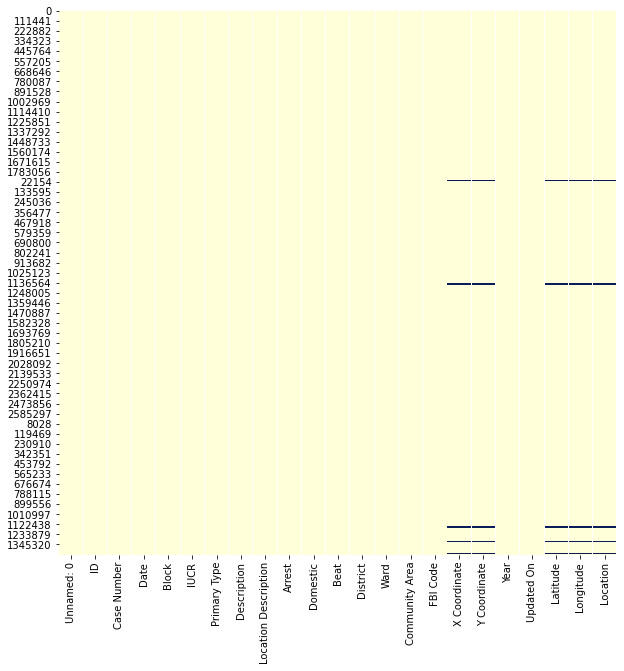

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [17]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'District'], inplace = True, axis = 1)

In [18]:
chicago_df.head(8)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False


In [21]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [23]:
chicago_df.Date.head(15)

0    2006-04-02 13:00:00
1    2006-02-26 13:40:48
2    2006-01-08 23:16:00
3    2006-04-05 18:45:00
4    2006-02-17 21:03:14
5    2006-03-30 22:30:00
6    2006-04-05 12:10:00
7    2006-04-05 15:00:00
8    2006-04-05 21:30:00
9    2006-04-03 03:00:00
10   2006-04-06 11:15:00
11   2006-04-04 20:15:00
12   2006-04-06 11:30:00
13   2006-02-26 14:47:21
14   2006-04-03 20:09:00
Name: Date, dtype: datetime64[ns]

In [33]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [26]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [27]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [29]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

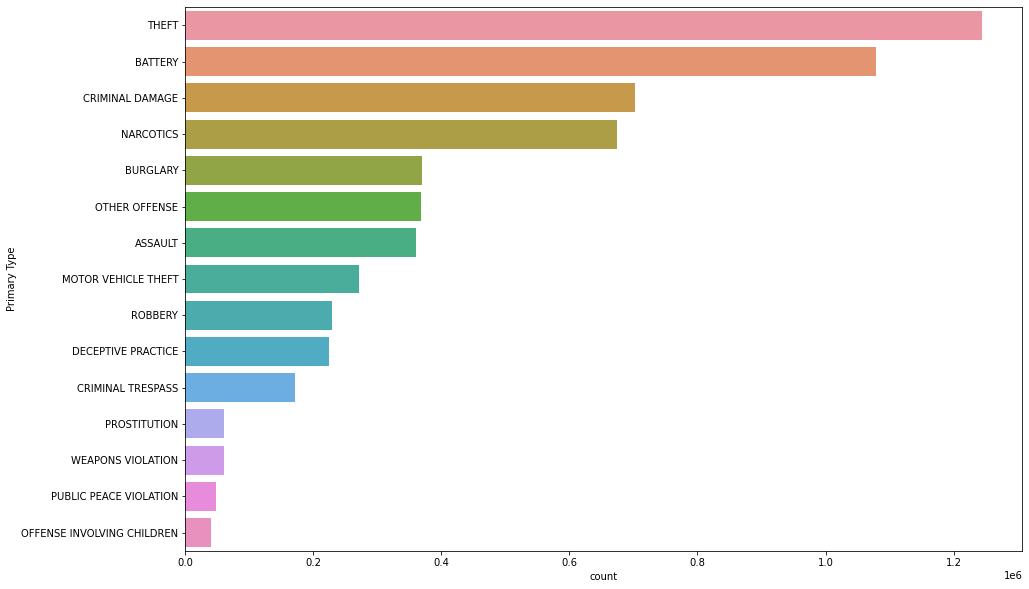

In [30]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data)

### Where the Crimes took place

<AxesSubplot:xlabel='count', ylabel='Location Description'>

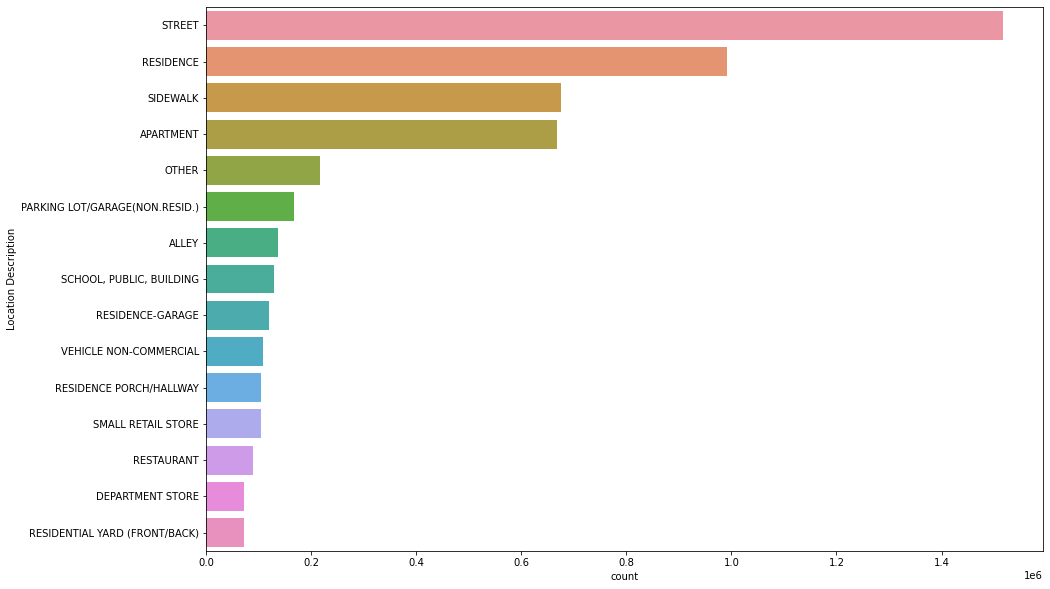

In [32]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

### How many of these crimes occured in a specific year, month, or day

In [36]:
chicago_df.resample('m').size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

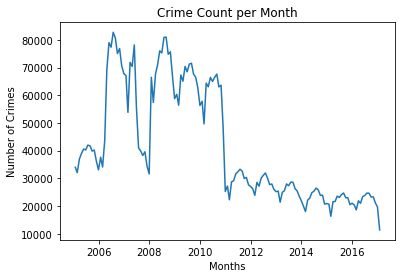

In [37]:
plt.plot(chicago_df.resample('m').size())
plt.title('Crime Count per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')


## Preparing the Data

In [40]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

### How many crimes occured each month

In [41]:
chicago_prophet 

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [42]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [43]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [44]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 'Crime Count': 'y'})

In [45]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


## Make Predictions!

In [46]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future = m.make_future_dataframe(periods = 365) # What will happen in the next year.
forecast = m.predict(future)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60379.720403,39161.488352,72875.534598,60379.720403,60379.720403,-4888.559945,-4888.559945,-4888.559945,-4888.559945,-4888.559945,-4888.559945,0.0,0.0,0.0,55491.160458
1,2005-02-28,60249.704311,33840.060693,67618.621499,60249.704311,60249.704311,-9556.480896,-9556.480896,-9556.480896,-9556.480896,-9556.480896,-9556.480896,0.0,0.0,0.0,50693.223415
2,2005-03-31,60105.757924,41933.415394,75463.161105,60105.757924,60105.757924,-1267.695327,-1267.695327,-1267.695327,-1267.695327,-1267.695327,-1267.695327,0.0,0.0,0.0,58838.062597
3,2005-04-30,59966.454969,45787.113827,78806.303633,59966.454969,59966.454969,1143.949615,1143.949615,1143.949615,1143.949615,1143.949615,1143.949615,0.0,0.0,0.0,61110.404583
4,2005-05-31,59822.508582,47544.063294,81924.209249,59822.508582,59822.508582,5464.443944,5464.443944,5464.443944,5464.443944,5464.443944,5464.443944,0.0,0.0,0.0,65286.952525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10040.415437,-10844.167126,23149.262714,9890.061884,10200.540226,-4019.723267,-4019.723267,-4019.723267,-4019.723267,-4019.723267,-4019.723267,0.0,0.0,0.0,6020.692171
506,2018-01-28,10027.195047,-10675.675904,22170.544521,9876.322556,10188.098619,-4201.000275,-4201.000275,-4201.000275,-4201.000275,-4201.000275,-4201.000275,0.0,0.0,0.0,5826.194771
507,2018-01-29,10013.974656,-10423.371849,22953.569389,9862.394111,10175.842397,-4397.189696,-4397.189696,-4397.189696,-4397.189696,-4397.189696,-4397.189696,0.0,0.0,0.0,5616.784959
508,2018-01-30,10000.754265,-12505.506666,21516.060952,9848.465666,10163.586175,-4607.406459,-4607.406459,-4607.406459,-4607.406459,-4607.406459,-4607.406459,0.0,0.0,0.0,5393.347806


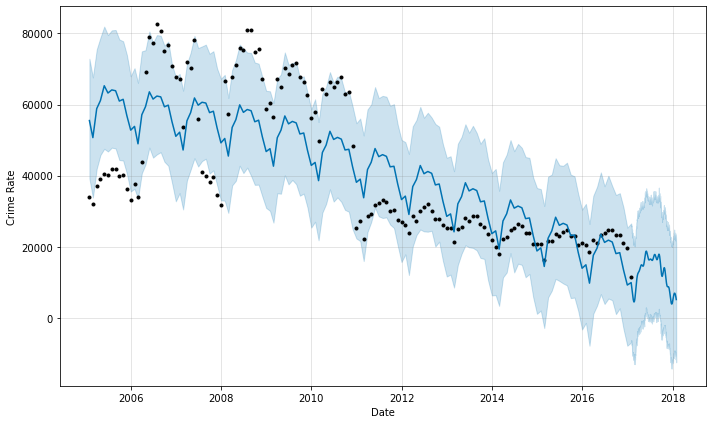

In [49]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

### Looking at the specifics of what will happen in a time-period

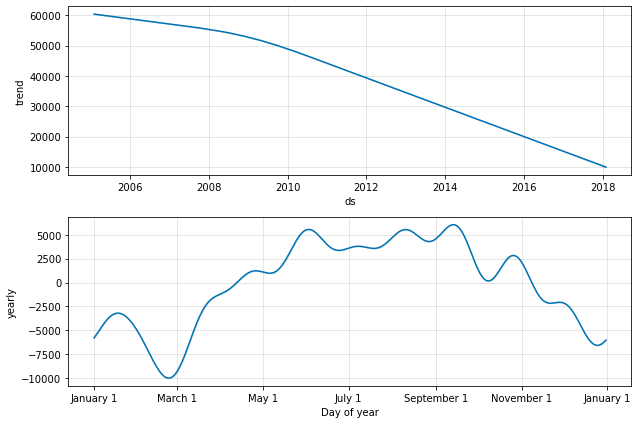

In [50]:
figure = m.plot_components(forecast)